In [53]:
import pandas as pd
import numpy as np
import random
import string

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import confusion_matrix, RocCurveDisplay, plot_confusion_matrix, roc_curve, auc, roc_auc_score, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from numpy import arange, argmax
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree

import matplotlib.pyplot as plt
%matplotlib inline

from numpy import mean

import matplotlib.pyplot as plt
%matplotlib inline


pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 1500)
pd.set_option("display.max_colwidth", None)

## Load the data

In [2]:
df_sample = pd.read_csv("sample_all_v2.csv")
df_sample.drop("Unnamed: 0", axis=1, inplace=True)

In [3]:
df_sample["prepayment_status_unique"].value_counts()

0    10962
1     2437
Name: prepayment_status_unique, dtype: int64

In [4]:
df = pd.read_csv("all_files_v2.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
df.head()

,customer_id,account_id,open_date_,original_principal_min,original_principal_max,original_principal_std,original_principal_max_minus_min,reporting_date_count,total_cust_exposure_min,total_cust_exposure_max,overdraft_min,overdraft_max,overdraft_size,overdraft_count0,overdraft_count1,overdraft_count2plus,consumer_loan_min,consumer_loan_max,consumer_loan_size,consumer_loan_count0,consumer_loan_count1,consumer_loan_count2plus,credit_card_min,credit_card_max,credit_card_size,credit_card_count0,credit_card_count1,credit_card_count2plus,customer_rating_min,customer_rating_max,customer_rating_modeX,maturity_date_min,maturity_date_max,maturity_date_max_minus_min,prepayment_status_unique,l_period_min,l_period_max,l_period_max_minus_min,interest_rate_min,interest_rate_max,interest_rate_max_minus_min,interest_rate_modeX,exp_monthly_payments_min,exp_monthly_payments_max,exp_monthly_payments_std,exp_monthly_payments_max_minus_min,current_principal_min,current_principal_max,current_principal_max_minus_min,interest_payment_min,interest_payment_max,interest_payment_max_minus_min,principal_payment_min,principal_payment_max,principal_payment_max_minus_min,deducted_principal_min,deducted_principal_max,deducted_principal_max_minus_min,deducted_vs_principal_payment_min,deducted_vs_principal_payment_max,deducted_vs_principal_payment_mean,deducted_vs_principal_payment_max_minus_min,principal_left_pctg_min,principal_left_pctg_max,principal_left_pctg_max_minus_min,collateral_id,market_value,collateral_type_M100,collateral_type_M101,collateral_type_M102,collateral_type_M103,collateral_type_M104,collateral_type_M105,town_Big,town_Capital,town_Major,town_Medium_Size,building_type_full,mortgage_utilisation_full,area_full,tot_mnth_income_full,gross_salary_full,profession_full,maritial_status_A49_full,maritial_status_I63_full,maritial_status_K16_full,maritial_status_M45_full,maritial_status_O32_full,maritial_status_Q37_full,maritial_status_U67_full,age_A788_full,age_F953_full,age_G219_full,age_H294_full,age_J454_full,age_M764_full,age_O456_full,age_P508_full,age_Q251_full,age_S205_full,age_T555_full,age_W677_full,age_X693_full,age_Z829_full,empl_type_A350_full,empl_type_C288_full,empl_type_H787_full,empl_type_I508_full,empl_type_L320_full,empl_type_P115_full,empl_type_Q237_full,empl_type_R412_full,empl_type_U768_full,empl_type_Y735_full,salary_principal_ratio,salary_total_cust_exposure_ratio,tot_income_principal_ratio,tot_income_cust_exposure_ratio,salary_tot_income_ratio
0,0x000100F424893C746F,0xF7CDAD654B6CE06334F9FE655212AAD1,2017-06-29,64800,64800,0.0,0,44,56155,63355,0,0,44,44,0,0,0,0,44,44,0,0,0,0,44,44,0,0,3.0,5.5,3.5,2042-06-29,2042-06-29,0,0,24,24,0,3.70,3.70,0.0,3.70,339.819283,339.819283,0.0,0.0,56155,62342,6187,173.144583,192.221167,19.076583,147.598116,166.674700,19.076583,0.0,2458.0,2458.0,-164.251200,2310.401884,39.390899,2474.653083,87.0,96.0,9.0,0xA1224902A54E10483EBEEFC973,72360,1,0,0,0,0,0,0,0,0,1,1.0,1.0,47.568,660.0,888.0,21.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014244,0.014016,0.010587,0.010417,0.014016
1,0x000224F02B4B39DDFE,0x5568E6E4AEB2DF832D6444950125EECB,2016-08-16,74880,74880,0.0,0,11,70449,72710,0,0,11,11,0,0,0,0,11,11,0,0,0,0,11,11,0,0,4.0,5.5,4.0,2042-08-16,2042-08-16,0,1,25,25,0,3.90,3.90,0.0,3.90,391.121433,391.121433,0.0,0.0,69729,71273,1544,226.619250,231.637250,5.018000,159.484183,164.502183,5.018000,147.0,3607.0,3460.0,-12.961933,3447.515817,306.287522,3460.477750,93.0,95.0,2.0,0x5A1DD802DAC694B446F8C6161B,93600,1,0,0,0,0,0,1,0,0,0,1.0,1.0,81.180,1487.0,0.0,42.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.020863,0.020451,0.000000
2,0x00025DA4C145ED8EBF,0x8C794E5D7336C4FE59B85E4400973723,2022-04-13,54000,54000,0.0,0,3,53248,54000,0,0,3,3,0,0,0,0,3,3,0,0,0,0,3,3,0,0,5.5,5.5,5.5,2033-04-13,2033-04-13,0,0,11,11,0,2.48,2.48,0.0,2.48,467.84

## Explore data

In [6]:
df["deducted_principal_min"].value_counts()

 0.0         30875
 177.0          27
 119.0          27
 146.0          26
 185.0          25
             ...  
 16290.0         1
-22824.0         1
-32903.0         1
-52407.0         1
 263088.0        1
Name: deducted_principal_min, Length: 3993, dtype: int64

In [7]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40602 entries, 0 to 40601
Data columns (total 119 columns):
 #    Column                                       Non-Null Count  Dtype  
---   ------                                       --------------  -----  
 0    customer_id                                  40602 non-null  object 
 1    account_id                                   40602 non-null  object 
 2    open_date_                                   40602 non-null  object 
 3    original_principal_min                       40602 non-null  int64  
 4    original_principal_max                       40602 non-null  int64  
 5    original_principal_std                       40602 non-null  float64
 6    original_principal_max_minus_min             40602 non-null  int64  
 7    reporting_date_count                         40602 non-null  int64  
 8    total_cust_exposure_min                      40602 non-null  int64  
 9    total_cust_exposure_max                      40602 non-null

In [8]:
df.head()

,customer_id,account_id,open_date_,original_principal_min,original_principal_max,original_principal_std,original_principal_max_minus_min,reporting_date_count,total_cust_exposure_min,total_cust_exposure_max,overdraft_min,overdraft_max,overdraft_size,overdraft_count0,overdraft_count1,overdraft_count2plus,consumer_loan_min,consumer_loan_max,consumer_loan_size,consumer_loan_count0,consumer_loan_count1,consumer_loan_count2plus,credit_card_min,credit_card_max,credit_card_size,credit_card_count0,credit_card_count1,credit_card_count2plus,customer_rating_min,customer_rating_max,customer_rating_modeX,maturity_date_min,maturity_date_max,maturity_date_max_minus_min,prepayment_status_unique,l_period_min,l_period_max,l_period_max_minus_min,interest_rate_min,interest_rate_max,interest_rate_max_minus_min,interest_rate_modeX,exp_monthly_payments_min,exp_monthly_payments_max,exp_monthly_payments_std,exp_monthly_payments_max_minus_min,current_principal_min,current_principal_max,current_principal_max_minus_min,interest_payment_min,interest_payment_max,interest_payment_max_minus_min,principal_payment_min,principal_payment_max,principal_payment_max_minus_min,deducted_principal_min,deducted_principal_max,deducted_principal_max_minus_min,deducted_vs_principal_payment_min,deducted_vs_principal_payment_max,deducted_vs_principal_payment_mean,deducted_vs_principal_payment_max_minus_min,principal_left_pctg_min,principal_left_pctg_max,principal_left_pctg_max_minus_min,collateral_id,market_value,collateral_type_M100,collateral_type_M101,collateral_type_M102,collateral_type_M103,collateral_type_M104,collateral_type_M105,town_Big,town_Capital,town_Major,town_Medium_Size,building_type_full,mortgage_utilisation_full,area_full,tot_mnth_income_full,gross_salary_full,profession_full,maritial_status_A49_full,maritial_status_I63_full,maritial_status_K16_full,maritial_status_M45_full,maritial_status_O32_full,maritial_status_Q37_full,maritial_status_U67_full,age_A788_full,age_F953_full,age_G219_full,age_H294_full,age_J454_full,age_M764_full,age_O456_full,age_P508_full,age_Q251_full,age_S205_full,age_T555_full,age_W677_full,age_X693_full,age_Z829_full,empl_type_A350_full,empl_type_C288_full,empl_type_H787_full,empl_type_I508_full,empl_type_L320_full,empl_type_P115_full,empl_type_Q237_full,empl_type_R412_full,empl_type_U768_full,empl_type_Y735_full,salary_principal_ratio,salary_total_cust_exposure_ratio,tot_income_principal_ratio,tot_income_cust_exposure_ratio,salary_tot_income_ratio
0,0x000100F424893C746F,0xF7CDAD654B6CE06334F9FE655212AAD1,2017-06-29,64800,64800,0.0,0,44,56155,63355,0,0,44,44,0,0,0,0,44,44,0,0,0,0,44,44,0,0,3.0,5.5,3.5,2042-06-29,2042-06-29,0,0,24,24,0,3.70,3.70,0.0,3.70,339.819283,339.819283,0.0,0.0,56155,62342,6187,173.144583,192.221167,19.076583,147.598116,166.674700,19.076583,0.0,2458.0,2458.0,-164.251200,2310.401884,39.390899,2474.653083,87.0,96.0,9.0,0xA1224902A54E10483EBEEFC973,72360,1,0,0,0,0,0,0,0,0,1,1.0,1.0,47.568,660.0,888.0,21.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014244,0.014016,0.010587,0.010417,0.014016
1,0x000224F02B4B39DDFE,0x5568E6E4AEB2DF832D6444950125EECB,2016-08-16,74880,74880,0.0,0,11,70449,72710,0,0,11,11,0,0,0,0,11,11,0,0,0,0,11,11,0,0,4.0,5.5,4.0,2042-08-16,2042-08-16,0,1,25,25,0,3.90,3.90,0.0,3.90,391.121433,391.121433,0.0,0.0,69729,71273,1544,226.619250,231.637250,5.018000,159.484183,164.502183,5.018000,147.0,3607.0,3460.0,-12.961933,3447.515817,306.287522,3460.477750,93.0,95.0,2.0,0x5A1DD802DAC694B446F8C6161B,93600,1,0,0,0,0,0,1,0,0,0,1.0,1.0,81.180,1487.0,0.0,42.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.020863,0.020451,0.000000
2,0x00025DA4C145ED8EBF,0x8C794E5D7336C4FE59B85E4400973723,2022-04-13,54000,54000,0.0,0,3,53248,54000,0,0,3,3,0,0,0,0,3,3,0,0,0,0,3,3,0,0,5.5,5.5,5.5,2033-04-13,2033-04-13,0,0,11,11,0,2.48,2.48,0.0,2.48,467.84

## Data Splitting

In [9]:
X = df.loc[:, ~df.columns.isin(['prepayment_status_unique'])]
Y = df["prepayment_status_unique"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=24)

In [11]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data.sort_index(inplace=True)

In [12]:
X_train.sort_index(inplace=True)
y_train.sort_index(inplace=True)
train_data = pd.concat([X_train, y_train], axis=1)

In [13]:
train_data.head()

,customer_id,account_id,open_date_,original_principal_min,original_principal_max,original_principal_std,original_principal_max_minus_min,reporting_date_count,total_cust_exposure_min,total_cust_exposure_max,overdraft_min,overdraft_max,overdraft_size,overdraft_count0,overdraft_count1,overdraft_count2plus,consumer_loan_min,consumer_loan_max,consumer_loan_size,consumer_loan_count0,consumer_loan_count1,consumer_loan_count2plus,credit_card_min,credit_card_max,credit_card_size,credit_card_count0,credit_card_count1,credit_card_count2plus,customer_rating_min,customer_rating_max,customer_rating_modeX,maturity_date_min,maturity_date_max,maturity_date_max_minus_min,l_period_min,l_period_max,l_period_max_minus_min,interest_rate_min,interest_rate_max,interest_rate_max_minus_min,interest_rate_modeX,exp_monthly_payments_min,exp_monthly_payments_max,exp_monthly_payments_std,exp_monthly_payments_max_minus_min,current_principal_min,current_principal_max,current_principal_max_minus_min,interest_payment_min,interest_payment_max,interest_payment_max_minus_min,principal_payment_min,principal_payment_max,principal_payment_max_minus_min,deducted_principal_min,deducted_principal_max,deducted_principal_max_minus_min,deducted_vs_principal_payment_min,deducted_vs_principal_payment_max,deducted_vs_principal_payment_mean,deducted_vs_principal_payment_max_minus_min,principal_left_pctg_min,principal_left_pctg_max,principal_left_pctg_max_minus_min,collateral_id,market_value,collateral_type_M100,collateral_type_M101,collateral_type_M102,collateral_type_M103,collateral_type_M104,collateral_type_M105,town_Big,town_Capital,town_Major,town_Medium_Size,building_type_full,mortgage_utilisation_full,area_full,tot_mnth_income_full,gross_salary_full,profession_full,maritial_status_A49_full,maritial_status_I63_full,maritial_status_K16_full,maritial_status_M45_full,maritial_status_O32_full,maritial_status_Q37_full,maritial_status_U67_full,age_A788_full,age_F953_full,age_G219_full,age_H294_full,age_J454_full,age_M764_full,age_O456_full,age_P508_full,age_Q251_full,age_S205_full,age_T555_full,age_W677_full,age_X693_full,age_Z829_full,empl_type_A350_full,empl_type_C288_full,empl_type_H787_full,empl_type_I508_full,empl_type_L320_full,empl_type_P115_full,empl_type_Q237_full,empl_type_R412_full,empl_type_U768_full,empl_type_Y735_full,salary_principal_ratio,salary_total_cust_exposure_ratio,tot_income_principal_ratio,tot_income_cust_exposure_ratio,salary_tot_income_ratio,prepayment_status_unique
0,0x000100F424893C746F,0xF7CDAD654B6CE06334F9FE655212AAD1,2017-06-29,64800,64800,0.0,0,44,56155,63355,0,0,44,44,0,0,0,0,44,44,0,0,0,0,44,44,0,0,3.0,5.5,3.5,2042-06-29,2042-06-29,0,24,24,0,3.70,3.70,0.0,3.70,339.819283,339.819283,0.000000,0.000000,56155,62342,6187,173.144583,192.221167,19.076583,147.598116,166.674700,19.076583,0.0,2458.0,2458.0,-164.251200,2310.401884,39.390899,2474.653083,87.0,96.0,9.0,0xA1224902A54E10483EBEEFC973,72360,1,0,0,0,0,0,0,0,0,1,1.0,1.0,47.568,660.0,888.0,21.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014244,0.014016,0.010587,0.010417,0.014016,0
2,0x00025DA4C145ED8EBF,0x8C794E5D7336C4FE59B85E4400973723,2022-04-13,54000,54000,0.0,0,3,53248,54000,0,0,3,3,0,0,0,0,3,3,0,0,0,0,3,3,0,0,5.5,5.5,5.5,2033-04-13,2033-04-13,0,11,11,0,2.48,2.48,0.0,2.48,467.844781,467.844781,0.000000,0.000000,53248,54000,752,110.045867,111.600000,1.554133,356.244781,357.798915,1.554133,0.0,398.0,398.0,-356.244781,40.932685,-106.370337,397.177467,99.0,100.0,1.0,0xD744613939B2BCC38B45EC917E,80400,1,0,0,0,0,0,0,0,0,1,2.0,1.0,74.904,1663.0,780.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014444,0.014444,0.030796,0.030796,0.014444,0
4,0x0004EAC7528D4869C1,0x1DE89AAB80B0FE12FBA0E35F21DDA118,2021-07-07,118320,118320,0.0,0,12,95275,116897,0,0,12,12,0,0,0,0,12,12,0,0,0,0,12,12,0,0,3.0,3.9,3.9,2051-07-07,2051-07-07,0,29,29,0,2.49,2.

In [14]:
train_data.shape

(28421, 119)

In [15]:
test_data.head()

,customer_id,account_id,open_date_,original_principal_min,original_principal_max,original_principal_std,original_principal_max_minus_min,reporting_date_count,total_cust_exposure_min,total_cust_exposure_max,overdraft_min,overdraft_max,overdraft_size,overdraft_count0,overdraft_count1,overdraft_count2plus,consumer_loan_min,consumer_loan_max,consumer_loan_size,consumer_loan_count0,consumer_loan_count1,consumer_loan_count2plus,credit_card_min,credit_card_max,credit_card_size,credit_card_count0,credit_card_count1,credit_card_count2plus,customer_rating_min,customer_rating_max,customer_rating_modeX,maturity_date_min,maturity_date_max,maturity_date_max_minus_min,l_period_min,l_period_max,l_period_max_minus_min,interest_rate_min,interest_rate_max,interest_rate_max_minus_min,interest_rate_modeX,exp_monthly_payments_min,exp_monthly_payments_max,exp_monthly_payments_std,exp_monthly_payments_max_minus_min,current_principal_min,current_principal_max,current_principal_max_minus_min,interest_payment_min,interest_payment_max,interest_payment_max_minus_min,principal_payment_min,principal_payment_max,principal_payment_max_minus_min,deducted_principal_min,deducted_principal_max,deducted_principal_max_minus_min,deducted_vs_principal_payment_min,deducted_vs_principal_payment_max,deducted_vs_principal_payment_mean,deducted_vs_principal_payment_max_minus_min,principal_left_pctg_min,principal_left_pctg_max,principal_left_pctg_max_minus_min,collateral_id,market_value,collateral_type_M100,collateral_type_M101,collateral_type_M102,collateral_type_M103,collateral_type_M104,collateral_type_M105,town_Big,town_Capital,town_Major,town_Medium_Size,building_type_full,mortgage_utilisation_full,area_full,tot_mnth_income_full,gross_salary_full,profession_full,maritial_status_A49_full,maritial_status_I63_full,maritial_status_K16_full,maritial_status_M45_full,maritial_status_O32_full,maritial_status_Q37_full,maritial_status_U67_full,age_A788_full,age_F953_full,age_G219_full,age_H294_full,age_J454_full,age_M764_full,age_O456_full,age_P508_full,age_Q251_full,age_S205_full,age_T555_full,age_W677_full,age_X693_full,age_Z829_full,empl_type_A350_full,empl_type_C288_full,empl_type_H787_full,empl_type_I508_full,empl_type_L320_full,empl_type_P115_full,empl_type_Q237_full,empl_type_R412_full,empl_type_U768_full,empl_type_Y735_full,salary_principal_ratio,salary_total_cust_exposure_ratio,tot_income_principal_ratio,tot_income_cust_exposure_ratio,salary_tot_income_ratio,prepayment_status_unique
1,0x000224F02B4B39DDFE,0x5568E6E4AEB2DF832D6444950125EECB,2016-08-16,74880,74880,0.0,0,11,70449,72710,0,0,11,11,0,0,0,0,11,11,0,0,0,0,11,11,0,0,4.0,5.5,4.0,2042-08-16,2042-08-16,0,25,25,0,3.90,3.90,0.00,3.90,391.121433,391.121433,0.000000,0.000000,69729,71273,1544,226.619250,231.63725,5.018000,159.484183,164.502183,5.018000,147.0,3607.0,3460.0,-12.961933,3447.515817,306.287522,3460.477750,93.0,95.0,2.0,0x5A1DD802DAC694B446F8C6161B,93600,1,0,0,0,0,0,1,0,0,0,1.0,1.0,81.180,1487.00,0.00,42.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.020863,0.020451,0.000000,1
3,0x0003C2466FAE7F0BEA,0xAAD9093643AACB7C73D1DAB125D551FE,2018-05-08,93600,93600,0.0,0,44,87324,92598,0,0,44,44,0,0,0,0,44,44,0,0,0,0,44,44,0,0,3.0,6.5,3.5,2053-05-08,2053-05-08,0,35,35,0,3.35,3.35,0.00,3.35,378.749527,378.749527,0.000000,0.000000,87324,92598,5274,243.779500,258.50275,14.723250,120.246777,134.970027,14.723250,0.0,1002.0,1002.0,-133.096819,881.753223,15.045854,1014.850042,93.0,99.0,6.0,0x607DA1BAEA089087390CA4010D,211680,1,0,0,0,0,0,0,1,0,0,1.0,1.0,126.360,2443.00,3120.00,11.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033694,0.033694,0.026383,0.026383,0.033694,0
10,0x00125FAF68C8D3F3D9,0x5C4EBF7B50A9E689B2BF6005B71C9A06,2020-05-21,248932,248932,0.0,0,26,238298,248932,0,0,26,26,0,0,0,0,26,26,0,0,0,0,26,26,0,0,4.0,6.5,5.5,2050-05-21,2050-05-2

In [16]:
test_data.shape

(12181, 119)

In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28421 entries, 0 to 40601
Columns: 118 entries, customer_id to salary_tot_income_ratio
dtypes: float64(70), int64(42), object(6)
memory usage: 25.8+ MB


## Feature Selection

In [18]:
features_selected = [col for col in X_train.columns if col not in ["customer_id", 
                                                                   "account_id",
                                                                   "collateral_id",
                                                                   "open_date_", 
                                                                   "maturity_date_min", 
                                                                   "maturity_date_max"]]

In [19]:
X_train_fs, X_test_fs = X_train[features_selected], X_test[features_selected]

## Standardize features

In [20]:
X_train_fs["exp_monthly_payments_std"].value_counts()

0.000000       20727
3066.219010        6
1522.836169        5
52.169929          4
55.703058          4
               ...  
153.097904         1
7.833698           1
268.361413         1
10.806798          1
22.397064          1
Name: exp_monthly_payments_std, Length: 7498, dtype: int64

In [21]:
X_train_fs.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28421 entries, 0 to 40601
Data columns (total 112 columns):
 #    Column                                       Non-Null Count  Dtype  
---   ------                                       --------------  -----  
 0    original_principal_min                       28421 non-null  int64  
 1    original_principal_max                       28421 non-null  int64  
 2    original_principal_std                       28421 non-null  float64
 3    original_principal_max_minus_min             28421 non-null  int64  
 4    reporting_date_count                         28421 non-null  int64  
 5    total_cust_exposure_min                      28421 non-null  int64  
 6    total_cust_exposure_max                      28421 non-null  int64  
 7    overdraft_min                                28421 non-null  int64  
 8    overdraft_max                                28421 non-null  int64  
 9    overdraft_size                               28421 non-null

In [22]:
# X_train_fs.loc[X_train_fs.isnull().any(axis=1)]

In [23]:
# X_train_fs.loc[X_train_fs.isnull().any(axis=1)].shape

In [24]:
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train_fs)
X_train_scaled = pd.DataFrame(data=X_train_sc, columns=features_selected)
y_train_values = y_train.values.ravel()

In [25]:
X_test_sc = scaler.transform(X_test_fs)
X_test_scaled = pd.DataFrame(data=X_test_sc, columns=X_test_fs.columns)

In [26]:
y_train.value_counts()

0    23200
1     5221
Name: prepayment_status_unique, dtype: int64

In [27]:
y_test.value_counts()

0    9935
1    2246
Name: prepayment_status_unique, dtype: int64

In [28]:
2164 / (2164 + 9638)

0.18335875275377056

In [29]:
1 - 0.18335875275377056

0.8166412472462294

## Modeling

#### Logistic Regression without weights

In [30]:
# define model
lg1 = LogisticRegression(random_state=13, max_iter=10000, class_weight=None)
# fit it
lg1.fit(X_train_scaled, y_train_values)
# test
y_pred = lg1.predict(X_test_scaled)# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.8766111156719482
Confusion Matrix: 
[[9664  271]
 [1232 1014]]
Area Under Curve: 0.7120959881258455
Recall score: 0.4514692787177204


#### Logistic Regression with weights

In [31]:
# # define class weights
# w = {0:1, 1:99}
w = {0:20, 1:80}


In [32]:
# define model
lg2 = LogisticRegression(random_state=13, max_iter=10000, class_weight=w)
# fit it
lg2.fit(X_train_scaled,y_train_values)
# test
y_pred = lg2.predict(X_test_scaled)# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.8037927920531976
Confusion Matrix: 
[[8154 1781]
 [ 609 1637]]
Area Under Curve: 0.7747930336143077
Recall score: 0.7288512911843277


### Random Forest

In [45]:
rf_clf = RandomForestClassifier(n_estimators=10, class_weight='balanced')

#### Test it with all data

In [46]:
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=13)
# evaluate model
scores = cross_val_score(rf_clf, X_train_scaled, y_train_values, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.977


In [47]:
rf_clf.fit(X_train_scaled, y_train_values)

RandomForestClassifier(class_weight='balanced', n_estimators=10)

In [48]:
y_pred_rf = rf_clf.predict(X_test_scaled)# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred_rf)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_rf)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred_rf)}')
print(f'Recall score: {recall_score(y_test,y_pred_rf)}')

Accuracy Score: 0.9712667268697152
Confusion Matrix: 
[[9900   35]
 [ 315 1931]]
Area Under Curve: 0.9281138845057432
Recall score: 0.8597506678539626


#### Feature importances

In [49]:
rf_clf.feature_importances_

array([4.14965817e-03, 2.67185460e-03, 0.00000000e+00, 8.35914774e-06,
       4.68915170e-02, 8.21252199e-03, 4.61866794e-03, 2.35984189e-04,
       4.88767478e-05, 2.62130423e-02, 2.49364473e-02, 2.18496579e-04,
       0.00000000e+00, 1.71220152e-05, 3.03706597e-05, 4.97389365e-02,
       7.55075840e-02, 2.03163668e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.56912003e-01, 8.74842657e-03, 8.12868545e-06,
       0.00000000e+00, 1.46356282e-03, 3.47894966e-03, 2.47938230e-03,
       1.56775267e-03, 2.42317493e-03, 2.46159907e-03, 6.02610501e-04,
       5.93607403e-02, 3.17126088e-02, 2.35379025e-03, 6.43317345e-02,
       4.07171136e-03, 4.29555445e-03, 2.46366426e-03, 9.39337716e-03,
       5.36596088e-03, 1.57007650e-02, 5.72161319e-03, 1.40665386e-02,
       5.23688983e-03, 4.30562761e-03, 4.19693769e-03, 3.92920185e-03,
       6.26084248e-03, 5.17671687e-02, 1.31098720e-02, 1.97625275e-02,
       3.76339894e-02, 2.35523432e-02, 3.33787812e-02, 2.85746141e-02,
      

<AxesSubplot:>

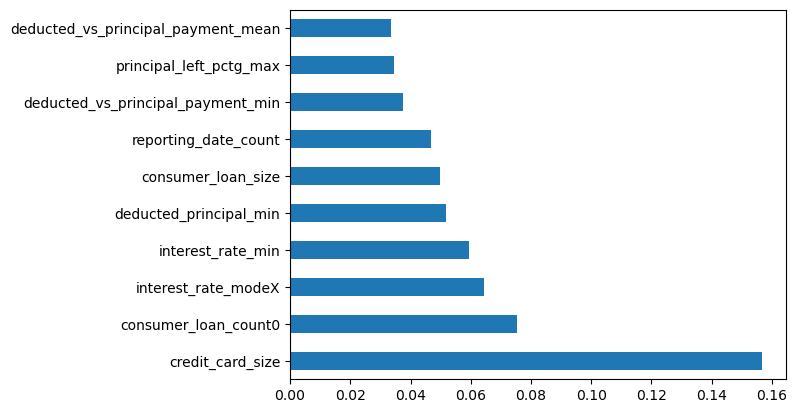

In [50]:
rf_feat_importances = pd.Series(rf_clf.feature_importances_, index=X_train_scaled.columns)
rf_feat_importances.nlargest(10).plot(kind='barh')

In [51]:
rf_best_feat_importances = list(rf_feat_importances.nlargest(10).index)
rf_best_feat_importances

['credit_card_size',
 'consumer_loan_count0',
 'interest_rate_modeX',
 'interest_rate_min',
 'deducted_principal_min',
 'consumer_loan_size',
 'reporting_date_count',
 'deducted_vs_principal_payment_min',
 'principal_left_pctg_max',
 'deducted_vs_principal_payment_mean']

## Decision Trees

### Default

In [54]:
# define model
tree_clf = DecisionTreeClassifier()

In [55]:
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(tree_clf, X_train_scaled, y_train_values, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.938


In [56]:
tree_clf.fit(X_train_scaled, y_train_values)

DecisionTreeClassifier()

In [57]:
y_pred_tree1 = tree_clf.predict(X_test_scaled)# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred_tree1)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_tree1)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred_tree1)}')
print(f'Recall score: {recall_score(y_test,y_pred_tree1)}')

Accuracy Score: 0.960676463344553
Confusion Matrix: 
[[9687  248]
 [ 231 2015]]
Area Under Curve: 0.9360941175521567
Recall score: 0.8971504897595726


### Using rf_best_features

In [58]:
# define model
tree_clf2 = DecisionTreeClassifier()

In [59]:
X_train_fs3, X_test_fs3 = X_train[rf_best_feat_importances], X_test[rf_best_feat_importances]

In [63]:
scaler = StandardScaler()

X_train_sc3 = scaler.fit_transform(X_train_fs3)
X_train_scaled3 = pd.DataFrame(data=X_train_fs3, columns=rf_best_feat_importances)
y_train_values3 = y_train.values.ravel()

X_test_sc3 = scaler.transform(X_test_fs3)
X_test_scaled3 = pd.DataFrame(data=X_test_sc3, columns=X_test_fs3.columns)

In [65]:
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(tree_clf2, X_train_scaled3, y_train_values, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.920


In [66]:
tree_clf2.fit(X_train_scaled3, y_train_values)

DecisionTreeClassifier()

In [67]:
y_pred_tree2 = tree_clf2.predict(X_test_scaled3)# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred_tree2)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_tree2)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred_tree2)}')
print(f'Recall score: {recall_score(y_test,y_pred_tree2)}')

Accuracy Score: 0.2676299154420819
Confusion Matrix: 
[[1973 7962]
 [ 959 1287]]
Area Under Curve: 0.38580477018698117
Recall score: 0.5730186999109528


## Plots

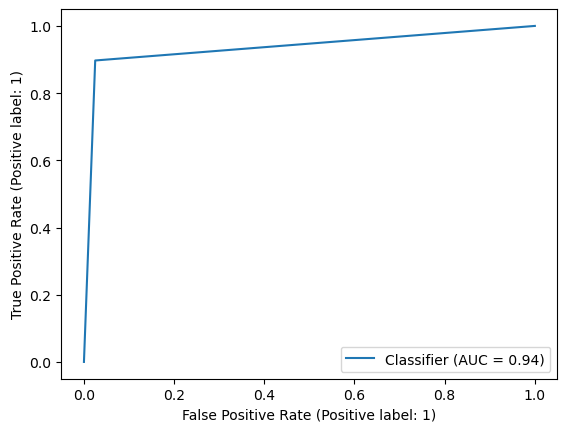

In [69]:
# RocCurveDisplay.from_predictions(y_test, y_pred_rf)
RocCurveDisplay.from_predictions(y_test, y_pred_tree1)
# RocCurveDisplay.from_predictions(y_test, y_pred_tree2)
plt.show()

In [ ]:
# tree.plot_tree(tree_clf2, max_depth=5)
# plt.show()

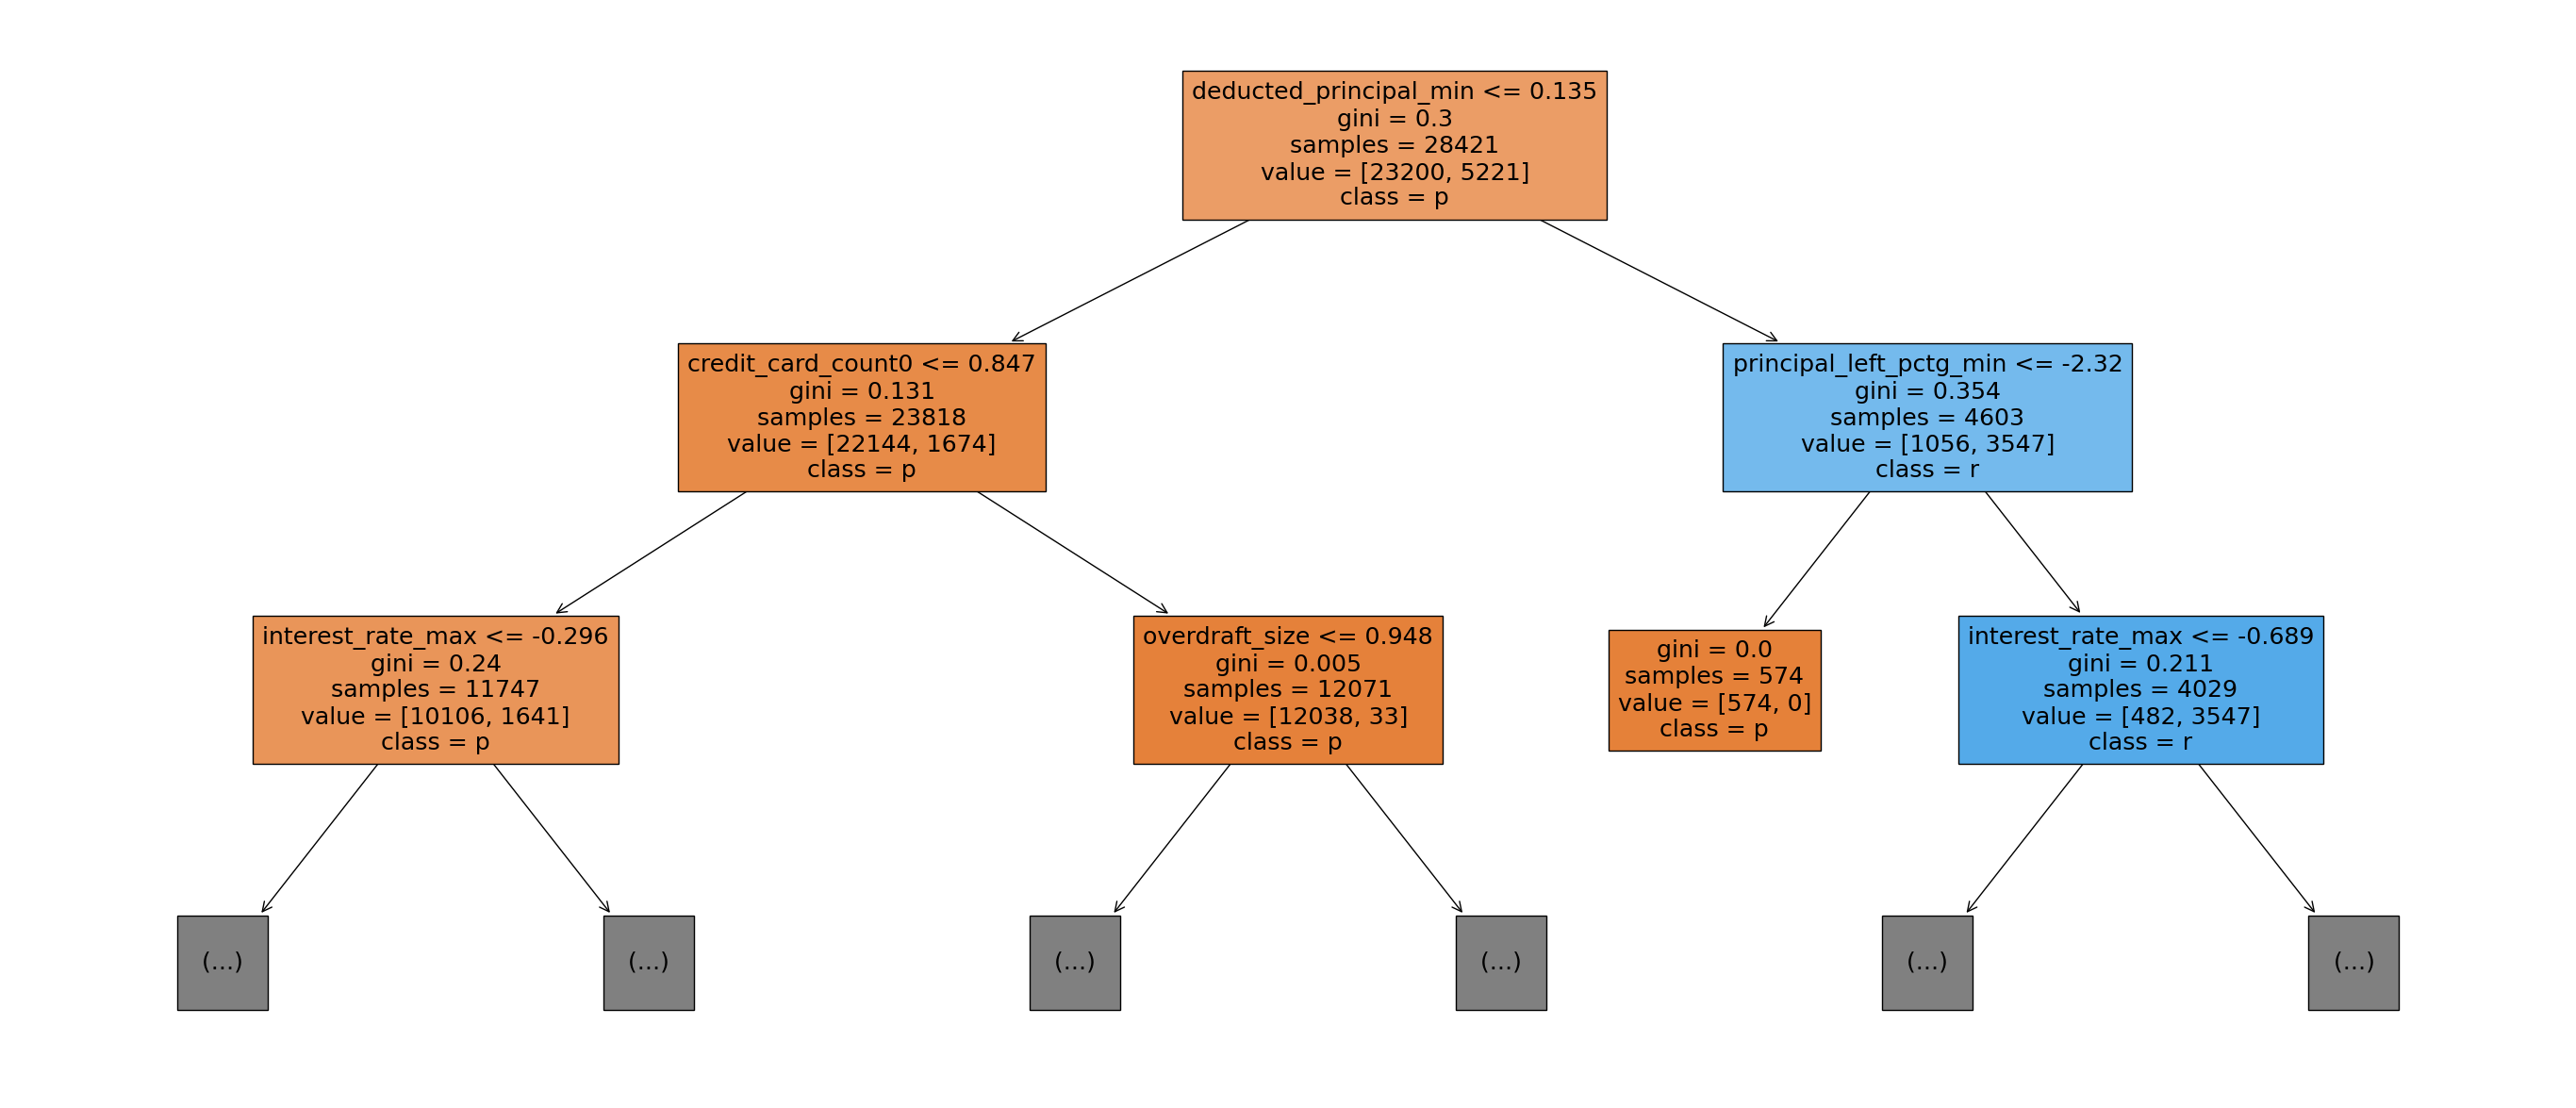

In [71]:
fig = plt.figure(figsize=(35,15))
_ = tree.plot_tree(tree_clf, 
                   feature_names=X_test_fs.columns,  
                   class_names=y_test.name,
                   filled=True,
                  max_depth=2)


In [74]:
fig.savefig("decistion_tree1_all_data.png")